In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

students = pd.read_csv(r'C:\Users\aksak\OneDrive\Masaüstü\DataJarlabs_Assignments\StudentsPerformance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
students.columns = [c.replace(' ', '_') for c in students.columns]
students.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


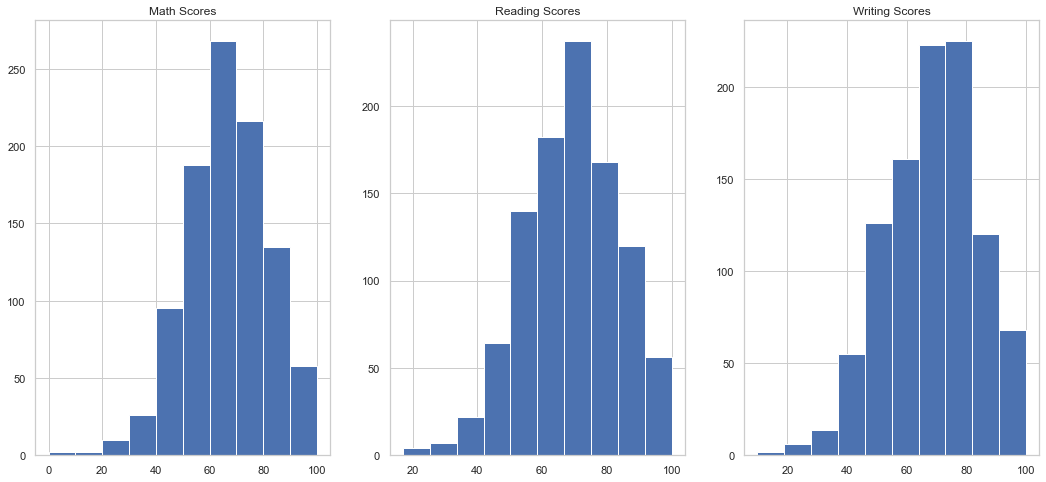

In [5]:
plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
plt.hist(students.math_score.dropna())
plt.title('Math Scores')

plt.subplot(1,3,2)
plt.hist(students.reading_score.dropna())
plt.title('Reading Scores')

plt.subplot(1,3,3)
plt.hist(students.writing_score.dropna())
plt.title('Writing Scores')

plt.show()

In [7]:
#We can winsorize the data, especially the first 0.10 part of each to get a normal distribution.

In [8]:
averages = []

for value in range(0,1000):
  averages.append( (students.math_score[value] + students.reading_score[value] + students.writing_score[value]) / 3 )


averages = pd.DataFrame(averages)
averages.columns = ['AVG_OF_3_EXAMS']
averages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AVG_OF_3_EXAMS  1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


(array([  1.,   5.,  12.,  40., 124., 178., 262., 210., 122.,  46.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <BarContainer object of 10 artists>)

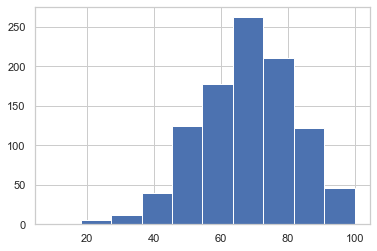

In [9]:
plt.hist(averages['AVG_OF_3_EXAMS'])

In [10]:
#It is closer to the normal distribution, but I'll try to winsorize it.

{'whiskers': [<matplotlib.lines.Line2D at 0x25ebc967a00>,
 'caps': [<matplotlib.lines.Line2D at 0x25ebc979100>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ebc9676a0>],
 'medians': [<matplotlib.lines.Line2D at 0x25ebc9797f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ebc979b50>],
 'means': []}

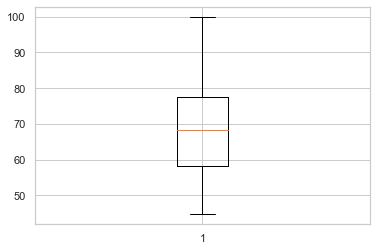

In [11]:
winsorizing1 = winsorize(np.array(averages.AVG_OF_3_EXAMS.dropna()), (0.05, 0.0))
plt.boxplot(winsorizing1)

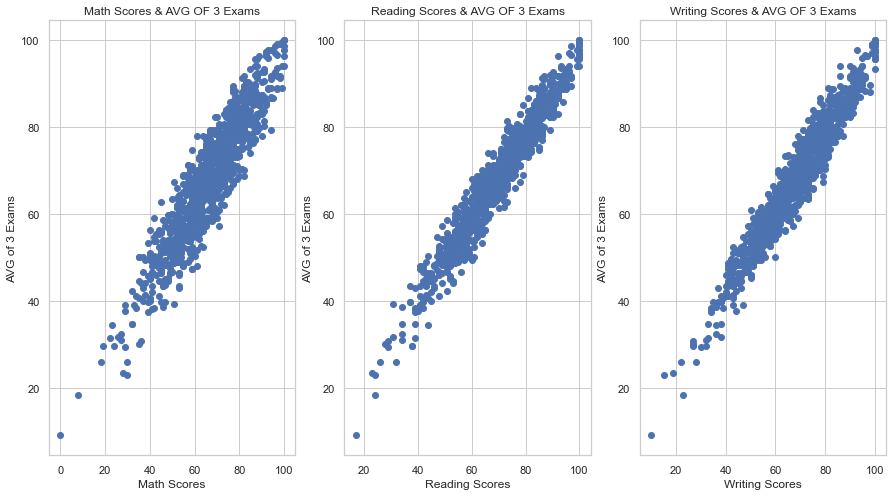

In [12]:
plt.figure(figsize=(15,8))

plt.subplot(131)
plt.scatter(students['math_score'], averages['AVG_OF_3_EXAMS'])
plt.title('Math Scores & AVG OF 3 Exams')
plt.xlabel('Math Scores')
plt.ylabel('AVG of 3 Exams')

plt.subplot(132)
plt.scatter(students['reading_score'], averages['AVG_OF_3_EXAMS'])
plt.title('Reading Scores & AVG OF 3 Exams')
plt.xlabel('Reading Scores')
plt.ylabel('AVG of 3 Exams')

plt.subplot(133)
plt.scatter(students['writing_score'], averages['AVG_OF_3_EXAMS'])
plt.title('Writing Scores & AVG OF 3 Exams')
plt.xlabel('Writing Scores')
plt.ylabel('AVG of 3 Exams')

plt.show()

In [13]:
# Here I added the 3 columns of students dataframe to the averages dataframe to be able to use the .corr() function
averages['math_score'] = students['math_score'].values
averages['reading_score'] = students['reading_score'].values
averages['writing_score'] = students['writing_score'].values
averages.corr()

,AVG_OF_3_EXAMS,math_score,reading_score,writing_score
AVG_OF_3_EXAMS,1.000000,0.918746,0.970331,0.965667
math_score,0.918746,1.000000,0.817580,0.802642
reading_score,0.970331,0.817580,1.000000,0.954598
writing_score,0.965667,0.802642,0.954598,1.000000


In [14]:
# One can see that reading_scores are more collerated with the average of 3 exams, so we can keep it, but math_scores are less collerated with the average.

In [16]:
averages['test_preparation_course'] = students['test_preparation_course'].values
averages.head()

,AVG_OF_3_EXAMS,math_score,reading_score,writing_score,test_preparation_course
0,72.666667,72,72,74,none
1,82.333333,69,90,88,completed
2,92.666667,90,95,93,none
3,49.333333,47,57,44,none
4,76.333333,76,78,75,none


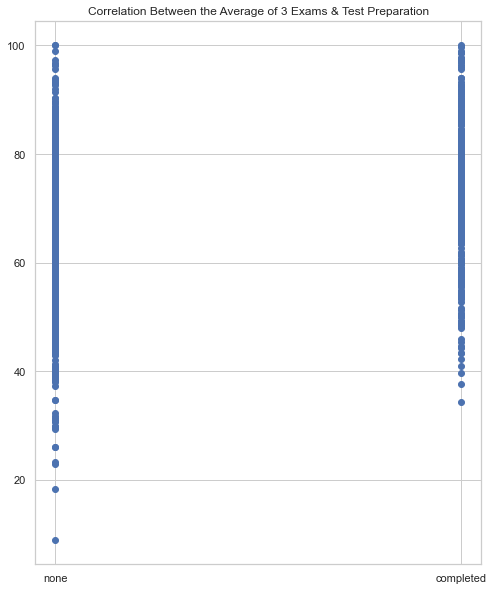

In [17]:
plt.figure(figsize=(8,10))
plt.title('Correlation Between the Average of 3 Exams & Test Preparation')
plt.scatter(averages['test_preparation_course'], averages['AVG_OF_3_EXAMS'])
plt.show()

In [18]:
# Yes, the test preparation has an effect on the average of the 3 classes.